 [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/nekotokurasu11/ai-implementation-test/blob/master/question1-10.ipynb)
### 下準備
import

In [ ]:
!pip install --user numpy matplotlib opencv-python sklearn scikit-image --upgrade

### Q.1. チャネル入れ替え
画像を読み込み、RGBをBGRの順に入れ替えよ

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("../assets/imori.jpg")
plt.imshow(img)
plt.show()

<Figure size 640x480 with 1 Axes>

/Users/sabe/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


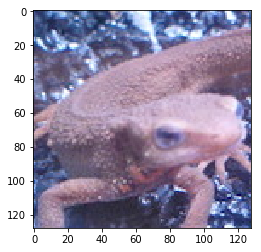

In [23]:
bgr_img = img[:, :, ::-1].copy()
plt.imshow(bgr_img)
plt.show()

In [24]:
# pltだとRGBで読み込むので微妙だが
# 画像本体についてはmg[:, :, ::-1]でBGR→RGBをしている(関数にすると以下)
def BGR2RGB(img):
    return img[:,:,::-1].copy()

In [25]:
result_img = BGR2RGB(img)

# save result
cv2.imwrite("out.jpg", result_img)
# 以下、jupter notebookだと落ちる
# cv2.imshow("result", result_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

True

### Q2.グレースケール化
画像をグレースケールにせよ。 グレースケールとは、画像の輝度表現方法の一種であり下式で計算される。  
Y = 0.2126 R + 0.7152 G + 0.0722 B

In [26]:
def BGR2GRAY(img):
    b = img[:,:,0].copy()
    g = img[:,:,1].copy()
    r = img[:,:,2].copy()
    result = 0.2126*r + 0.7152*g + 0.0722*b
    # 型変換（回答見てできていなかったところ）
    result = result.astype(np.uint8)
    return result

In [27]:
# 画像の読み込み
img = cv2.imread("../assets/imori.jpg").astype(np.float)

result_img2 = BGR2GRAY(img)
cv2.imwrite("result_img2.jpg", result_img2)
# imshowはカラーで表示させるもの
# plt.imshow(result_img2)
# plt.gray()
# plt.show()

True

### Q.3.二値化
画像を二値化せよ。二値化とは、画像を黒と白の二値で表現する方法である。ここでは、グレースケールにおいて閾値を128に設定し、下式で二値化する。

In [28]:
def GRAY2BINARY(gray_img):
    
    x, y = gray_img.shape
    result = gray_img.copy()
    
    for i in range(x):
        for j in range(y):
            if gray_img[i,j] < 128:
                result[i,j] = 0
            else:
                result[i,j]=255
    
    return result        

In [29]:
def binarization(img, th=128):
    # そういえばこういった書き方あった。
    img[img < th] = 0
    img[img >= th] = 255
    return img

/Users/sabe/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


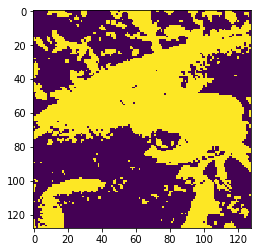

In [30]:
# 画像の読み込み
img = cv2.imread("../assets/imori.jpg").astype(np.float)
# グレイスケール
gray_img = BGR2GRAY(img)
#　二値化
# binary_img = GRAY2BINARY(gray_img)
binary_img = binarization(gray_img)

plt.imshow(binary_img)
plt.show()

### Q.4. 大津の二値化
大津の二値化を実装せよ。大津の二値化とは判別分析法と呼ばれ、  
`二値化における分離の閾値を自動決定する手法である。`  
**これはクラス内分散**と**クラス間分散**の比から計算される。（急に難しくなった感）

グレースケールの輝度値（ピクセルの値）のヒストグラムは以下のようになる。

/Users/sabe/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


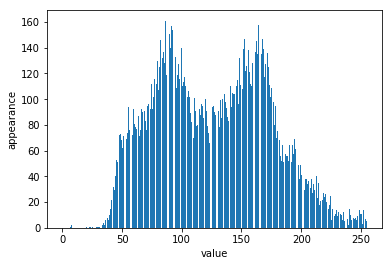

In [31]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('../assets/imori.jpg')
gray = 0.2126 * img[..., 2] + 0.7152*img[..., 1] + 0.0722*img[..., 0]
plt.hist(gray.ravel(), bins=255, rwidth=0.8, range=(0, 255))
plt.xlabel('value')
plt.ylabel('appearance')
plt.show()

二値化はある値を境界にして、0か1にする方法。  
大津の二値化は閾値を自動的に決定する方法である。  
ここでは閾値によって分離される画素をそれぞれクラス0,1とする。

ある閾値tによって、クラス0と1がうまく分離できれば良い二値化と言える。  
と言うことで、クラス0と1の分離度を定義する。

$\omega_0, \omega_1$…クラス0,1に属する画素数  
$\sigma_0, \sigma_1$ …クラス0,1に属する画素値の分散  
$M_0, M_1$ …クラス0,1に属する画素値の平均値  
$M_l$…画像全体の画素値の平均値  
$P_0,P_1$…クラス0,1に属する画素値の合計値  
とすると、  
クラス0,1の分散の重み付き和を示す**クラス内分散**は次式となる。  
$$\sigma_w^2 = w_0\sigma_0^2+w_1\sigma_1^2$$
クラス0,1の平均値が画像全体n平均からどれだけ離れているかを示すクラス間分散は次式となる。  
$$\sigma_b^2=(導出過程)= \frac{\omega_0\omega_1}{(\omega_0+\omega_1)^2}(M_0-M_1)^2$$
※導出過程が長くてとばしている。  
分散の度合いが**クラス内分散が小さく、かつクラス間分散が大きく**なるように定義される。（クラス分類と同様の考え方）  
$$X = \frac{\sigma_b^2}{\sigma_w^2}$$
画像全体の画素の分散はクラス内分散とクラス間分散の和となる。  
$$\sigma_l^2 = \sigma_w^2 +  \sigma_b^2$$
よって分離度Xは次式で定義される。  
$$X=\frac{\sigma_b^2}{\sigma_w^2}=\frac{\sigma_b^2}{\sigma_l^2-\sigma_b^2}$$
この分離度が最大となれば良い、つまりクラス間分散が最大になれば良い。  
$$argmax_tX=argmax_t\sigma_b^2$$
つまり、閾値を0~255の各値でクラス間分散を計算し、最大になる閾値が最適な閾値である。

In [32]:
import numpy as np

def get_threshold(img):
    result = 1
    siguma = 0
    for th in range(255):
        #　クラス0に属する画素数
        w0 = np.count_nonzero(img[img<th])
        #　クラス1に属する画素数
        w1 = np.count_nonzero(img[img>=th])
        #　クラス0に属する画素数
        M0 = np.sum(img[img<th]) / w0
        #　クラス1に属する画素数
        M1 = np.sum(img[img>=th]) /w1
        if not np.isnan(w0) and not np.isnan(w1) and not np.isnan(M0) and not np.isnan(M1):
            temp = (w0*w1/(w0+w1)**2)*((M0-M1)**2)
            if siguma <= temp:
                siguma = temp
                result = th
    return result

/Users/sabe/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
/Users/sabe/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


127


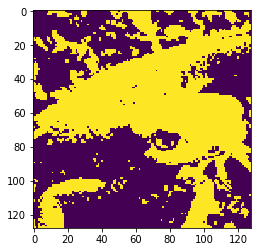

In [33]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('../assets/imori.jpg').astype(np.float)
# グレイスケール
gray_img = BGR2GRAY(img)
th = get_threshold(gray_img)
print(th)
binary_img = binarization(gray_img, th)
plt.imshow(binary_img)
plt.show()

In [34]:
#回答バージョン
def otsu_binarization(img):
    max_sigma = 0
    max_t = 0
    H, W = img.shape
    # determine threshold
    for _t in range(1, 256):
        v0 = img[np.where(img < _t)]
        m0 = np.mean(v0) if len(v0) > 0 else 0.
        w0 = len(v0) / (H*W)
        v1 = img[np.where(img >= _t)]
        m1 = np.mean(v1) if len(v1) > 0 else 0.
        w1 = len(v1) / (H*W)
        sigma = w0 * w1 * ((m0 - m1) ** 2)
        if sigma > max_sigma:
            max_sigma =sigma
            max_t = _t
            
    return max_t

In [35]:
# グレイスケール
gray_img = BGR2GRAY(img)
print(otsu_binarization(gray_img))

127


### Q.5. HSV変換
HSV変換を実装して、色相Hを反転せよ。  
HSV変換とは、**Hue(色相)、Saturation(彩度)、Value(明度)**で色を表現する手法

- Hue ...色合いを0~360度で表現し、赤や青など色の種類を示す。（0<= H <360）色相は次の色に対応する。

```
赤　　黄色　　緑　　水色　　青　　   紫　  　 赤
0  60  120  180  240  300  360
```

- Saturation ... 色の鮮やかさ。Saturationが低いと灰色さが顕著になり、くすんだ色となる。 ( 0<= S < 1)

- Value ... 色の明るさ。Valueが高いほど白に近く、Valueが低いほど黒に近くなる。 ( 0 <= V < 1)

RGB -> HSV変換は以下の式で定義される。  
R,G,Bが[0, 1]の範囲にあるとする。

```
Max = max(R,G,B)
Min = min(R,G,B)

H =  { 0                            (if Min=Max)
       60 x (G-R) / (Max-Min) + 60  (if Min=B)
       60 x (B-G) / (Max-Min) + 180 (if Min=R)
       60 x (R-B) / (Max-Min) + 300 (if Min=G)
       
V = Max

S = Max - Min
```

HSV -> RGB変換は以下の式で定義される。

```
C = S

H' = H / 60

X = C (1 - |H' mod 2 - 1|)

(R,G,B) = (V - C) (1,1,1) + { (0, 0, 0)  (if H is undefined)
                              (C, X, 0)  (if 0 <= H' < 1)
                              (X, C, 0)  (if 1 <= H' < 2)
                              (0, C, X)  (if 2 <= H' < 3)
                              (0, X, C)  (if 3 <= H' < 4)
                              (X, 0, C)  (if 4 <= H' < 5)
                              (C, 0, X)  (if 5 <= H' < 6)
```

ここでは色相Hを反転(180を加算)し、RGBに直し画像を表示せよ。

In [ ]:
# こちらはまだうまくいっているような気がする。
def BGR2HSV(img):
    b = img[:,:,0].copy()
    g = img[:,:,1].copy()
    r = img[:,:,2].copy()
    x, y, z = img.shape
    # 初期化
    h = np.zeros((x,y))
    v = np.zeros((x,y))
    s = np.zeros((x,y))
    for i in range(x):
        for j in range(y):
            rs = r[i, j]
            gs = g[i, j]
            bs = b[i, j]
            max_v = max(rs, gs, bs)
            min_v = min(rs, gs, bs)
            if min_v == max_v:
                h[i,j] = 0
            elif min_v == bs:
                h[i,j] = 60*(gs-rs)/(max_v - min_v) + 60
            elif min_v == rs:
                h[i,j] =60*(bs-gs)/(max_v - min_v) +180
            elif min_v == gs:
                h[i,j] =60*(rs-bs)/(max_v - min_v) +300
            v[i,j]=max_v
            s[i,j]=max_v - min_v
    return h, v, s

In [36]:
# こっちは完全に実装できてない
def HSV2RGB(h, s, v):
    # 配列（ndarray）の各要素を計算するにはnpのメソッドを使う必要がある。
    c = s
    hd = h/60
    x =c*(1 - np.abs(np.mod(hd, 2) - 1))
    
    a = (v - c)*(1,1,1) + np.where(hd is None)*(0,0,0) + np.where(0<= hd < 1)*(c,x,0)+np.where(1<= hd < 2)*(x,c,0) + np.where(2<= hd < 3)*(0,c,x) + np.where(3<= hd < 4)*(0,x,c) + np.where(4<= hd < 5)*(x,0,c) + np.where(5<= hd < 6)*(c,0,x) 
    rgb_img[:,:,0] = r
    rgb_img[:,:,1] = g
    rgb_img[:,:,2] = b
    return rgb_img
    

In [8]:
#print(img.shape)
#print(img)
# 128×3
# a = np.max(img, axis=0).copy()
# 128×3
# b = np.max(img, axis=1).copy()

print(img[...,0][1,2,3])
# print("a")
# print(a)
# print("b")
# print(b)
#np.argmin(img, axis=2)

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

In [18]:
# 回答
import numpy as np

def ANS_BGR2HSV(_img):
    # BGR は 0~255だよね、0~1の範囲にするなら255で割ろうね
    img = _img.copy() / 255.
    
    hsv = np.zeros_like(img, dtype=np.float32)
    
    # get max
    # axis=2は各二次元配列の行方向の最大値(つまり返値はnp.array)
    # 以下128×128となる
    max_v = np.max(img, axis=2).copy()
    min_v = np.min(img, axis=2).copy()
    min_arg = np.argmin(img, axis=2)
    
    # H
    #  hsv[...,0]までは128×128のnp配列
    # 次の[]はインデックス指定
    hsv[...,0][np.where(max_v == min_v)] = 0
    # if min == B(Bは0の位置)
    ind = np.where(min_arg == 0)
    hsv[..., 0][ind] = 60 * (img[..., 1][ind] - img[..., 2][ind]) / (max_v[ind] - min_v[ind]) + 60
    # if min == R(Rは2の位置)
    ind = np.where(min_arg == 2)
    hsv[..., 0][ind] = 60*(img[..., 0][ind] - img[..., 1][ind]) / (max_v[ind] - min_v[ind]) + 180
    # if min == G(Gは1の位置)
    ind = np.where(min_arg == 1)
    hsv[..., 0][ind] = 60 * (img[..., 2][ind] - img[..., 0][ind])/(max_v[ind] - min_v[ind]) + 300
    
    # S
    hsv[..., 1] = max_v.copy() - min_v.copy()
    
    # V
    hsv[..., 2] = max_v.copy()
    
    return hsv

In [37]:
def ANS_HSV2BGR(_img, hsv):
    # できればimgは引数にしたくない気もするけどな・・・
    img = _img.copy() / 255.
    
    # get max and min
    max_v = np.max(img, axis=2).copy()
    min_v = np.min(img, axis=2).copy()
    
    out = np.zeros_like(img)
    
    H = hsv[..., 0]
    S = hsv[..., 1]
    V = hsv[..., 2]
    
    C = S
    H_ = H / 60.
    X = C * (1 - np.abs( H_ % 2 - 1))
    # 0
    Z =np.zeros_like(H)
    
    # 公式の反転してBGR
    vals =[[Z, X, C], [Z, C, X], [X, C, Z], [C, X, Z], [C, Z, X], [X, Z, C]]
    
    for i in range(6):
        # 該当のindex部分を出して来る
        ind = np.where((i <= H_) & (H_ < (i+1)))
        # B用の計算
        out[..., 0][ind] = (V - C)[ind] + vals[i][0][ind]
        #　G用の計算
        out[..., 1][ind] = (V - C)[ind] + vals[i][1][ind]
        # R用の計算
        out[..., 2][ind] = (V - C)[ind] + vals[i][2][ind]
        
    # Hが0のときじゃダメ？
    out[np.where(max_v == min_v)] = 0
    out = np.clip(out, 0, 1)
    out = (out * 255).astype(np.uint8)
    
    return out
    

In [38]:
import cv2
import numpy as np
img = cv2.imread("../assets/imori.jpg").astype(np.float)
#h,s,v = BGR2HSV(img)
#out_img = HSV2RGB(h+180, s, v)
hsv = ANS_BGR2HSV(img)

# Transpose Hue
hsv[..., 0] = (hsv[..., 0] + 180) % 360

out = ANS_HSV2BGR(img, hsv)

# save result
cv2.imwrite('./out2.jpg', out)

[[[ 67 119 132]
  [ 38  88 104]
  [ 35  81 100]
  ...
  [109 175 174]
  [ 70 116 134]
  [100 137 163]]

 [[ 71 123 140]
  [ 51 104 117]
  [ 47  98 106]
  ...
  [135 173 177]
  [123 162 176]
  [ 91 132 152]]

 [[ 69 121 137]
  [ 66 120 131]
  [ 60 111 119]
  ...
  [148 200 207]
  [159 212 232]
  [ 82 139 161]]

 ...

 [[151 210 231]
  [ 80 136 153]
  [ 97 150 160]
  ...
  [ 37  90 107]
  [ 38  78 101]
  [ 36  70  93]]

 [[175 232 255]
  [ 95 153 172]
  [104 156 168]
  ...
  [ 58 131 150]
  [ 34  95 119]
  [ 32  87 112]]

 [[129 190 213]
  [109 166 187]
  [112 164 176]
  ...
  [ 94 161 185]
  [ 71 124 151]
  [ 38  85 116]]]


True